In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

### Задание 1

In [27]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    
    plt.figure(figsize=figsize)
    ind = np.arange(10)
    rects = plt.barh(ind, bars_length,  color='lightsteelblue')
    plt.xticks(np.arange(-10, 10, 2.5), fontsize=33)
    plt.yticks(np.arange(10), yticks_labels, fontsize=33)
    plt.grid(True)

    #добавляем текст справа
    for i in range(len(rects)):
        width = rects[i].get_width()
        if width < 0:
            width = 0
        plt.annotate(labels[i],fontsize=34,
                    xy=(width, rects[i].get_y() + rects[i].get_height()/2),
                    xytext=(0,0),
                    textcoords='offset points')
              
    

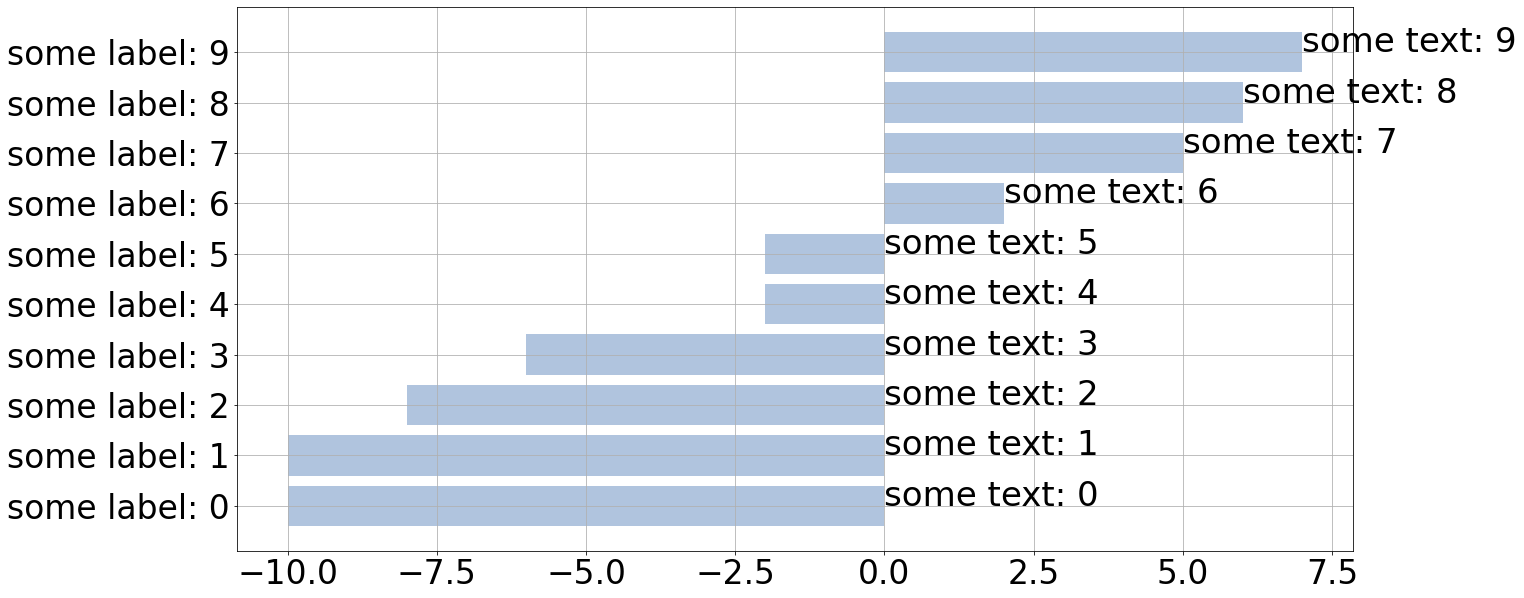

In [30]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Задание 2

In [31]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize = (20, 5))
    cmap=plt.get_cmap("coolwarm")
    start = np.zeros((len(dti),))
    for i in range(10):
        stop = start + probabilities_in_time.iloc[:, i]
        plt.plot(stop, color='grey', lw=0.25)
        name = 'Probability: {}'.format(i)
        plt.fill_between(stop.index, stop, start, color = cmap(i/9), label=name)
        start = stop
        plt.legend(loc='lower left', prop={'size':14})

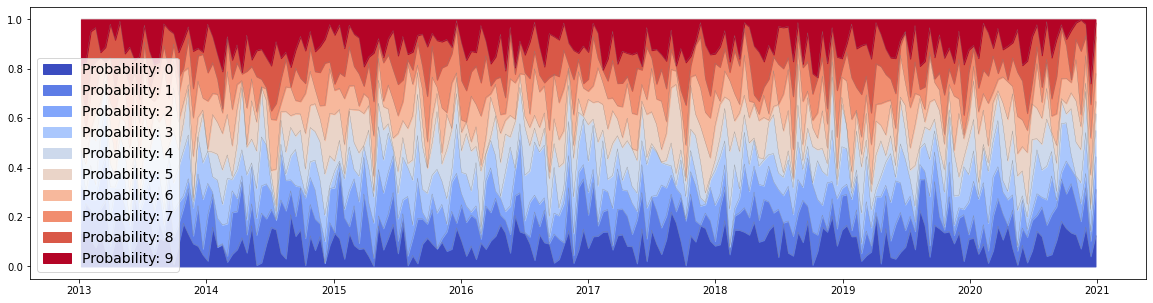

In [32]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)